In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords as nltk_stopwords
import nltk
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import re
import pickle
InteractiveShell.ast_node_interactivity = "all"
# nltk.download()

In [2]:
df_enu = pd.read_csv('H:/Python/PyProj/Scopus_data/gum_2015_2022_20211020.csv', sep=';')[['EID', 'Abstract', 'Index Keywords']].dropna().reset_index(drop=True)
df_su = pd.read_csv('H:/Python/PyProj/Scopus_data/su_2015_2022_20211020.csv')[['EID', 'Abstract', 'Index Keywords']].dropna().reset_index(drop=True)
df_farabi = pd.read_csv('H:/Python/PyProj/Scopus_data/farabi_2015_2017_20211021.csv')[['EID', 'Abstract', 'Index Keywords']].dropna().reset_index(drop=True)
df_tpu = pd.read_csv('H:/Python/PyProj/Scopus_data/tpu_2015_20211021.csv')[['EID', 'Abstract', 'Index Keywords']].dropna().reset_index(drop=True)
df_enu.columns = ['eid', 'abstract', 'ind_keywords']
df_su.columns = ['eid', 'abstract', 'ind_keywords']
# df_tpu.columns = ['eid', 'abstract', 'ind_keywords']
df_farabi.columns = ['eid', 'abstract', 'ind_keywords']
df_enu
df_su
# full_df = df_enu.append(df_su).append(df_farabi).append(df_tpu).drop_duplicates().reset_index(drop=True)
full_df = df_enu.append(df_su).append(df_farabi).drop_duplicates().reset_index(drop=True)
full_df

,eid,abstract,ind_keywords
0,2-s2.0-85116011920,Providing comfortable indoor air quality contr...,Air conditioning; Air quality; Backpropagation...
1,2-s2.0-85115352619,The relevance of the use of man-made waste and...,Concrete mixers; Concrete products; Metals; Mi...
2,2-s2.0-85115083195,Two transportation megaprojects in Kazakhstan ...,Freight transportation; Light rail transit; Pi...
3,2-s2.0-85111994486,The study is devoted to the electronic propert...,Crystal structure; Current density; Electrodep...
4,2-s2.0-85103807135,Recent studies on water retention behaviour of...,adsorption; article; desorption; Eichhornia cr...
...,...,...,...
1145,2-s2.0-84925341941,Dispersion equations are derived for verticall...,Anisotropy; Dispersions; Elastic waves; Surfac...
1146,2-s2.0-84923163411,The total cross section for the interaction of...,Deuterium; Background conditions; Null test; P...
1147,2-s2.0-84922198054,The results of modeling of radiation defects f...,Cellular automata; Fractals; Multi fractals; M...
1148,2-s2.0-84914148329,A 10 mm hydrocyclone was operated using a bari...,Cyclone separators; Energy utilization; Partic...


,eid,abstract,ind_keywords
0,2-s2.0-85115393617,The paper presents the results of laboratory s...,Emulsification; Flotation; Microemulsions; Ore...
1,2-s2.0-85115380672,The flotation of copper-molybdenum ores Aktoga...,Copper; Flotation; Ore treatment; Ores; Concen...
2,2-s2.0-85115360623,On the territory there are phosphorus-containi...,Chemical activation; Phosphorus; Slags; Sorpti...
3,2-s2.0-85115344466,The paper contains the laboratory study result...,Extraction; Gold; Microemulsions; Sodium; Buty...
4,2-s2.0-85115339481,The results analysis of calculating the stress...,Metals; Powder metals; Analytical method; Load...
...,...,...,...
999,2-s2.0-84923249677,The article examines primary causes of problem...,Oil well drilling; Clay particles; Complex env...
1000,2-s2.0-84922469420,[No abstract available],numerical model; risk assessment; seismicity; ...
1001,2-s2.0-84921342510,The paper presents results of the crystalogeom...,Aluminum; Shear strain; X ray analysis; X ray ...
1002,2-s2.0-84921342479,The work contains the results of a nano-struct...,Asbestos; Construction industry; Mechanical pr...


,eid,abstract,ind_keywords
0,2-s2.0-85116011920,Providing comfortable indoor air quality contr...,Air conditioning; Air quality; Backpropagation...
1,2-s2.0-85115352619,The relevance of the use of man-made waste and...,Concrete mixers; Concrete products; Metals; Mi...
2,2-s2.0-85115083195,Two transportation megaprojects in Kazakhstan ...,Freight transportation; Light rail transit; Pi...
3,2-s2.0-85111994486,The study is devoted to the electronic propert...,Crystal structure; Current density; Electrodep...
4,2-s2.0-85103807135,Recent studies on water retention behaviour of...,adsorption; article; desorption; Eichhornia cr...
...,...,...,...
2691,2-s2.0-84930445457,We report new results in the study of cryoradi...,Chemical activation; Condensation; Electric po...
2692,2-s2.0-84929470270,The results of modeling of isotopic water mixt...,Absorption spectroscopy; Hydrogen bonds; Inert...
2693,2-s2.0-84927596922,Coupled flexural-torsional vibrations of drill...,Deformation; Dispersions; Drill strings; Drill...
2694,2-s2.0-84927582241,The paper studies dynamics of the statically u...,Centrifuges; Dynamics; Machinery; Rotors; Vibr...


In [3]:
data_enu = pd.read_excel('H:/Python/PyProj/DATA_of_unis/ENU_crawled_2015_2022_20211015.xlsx')
data_enu

data_su = pd.read_excel('H:/Python/PyProj/Scopus_app/SU_2015_2022_data_20210910.xlsx')
data_su

# data_tpu = pd.read_excel('H:/Python/PyProj/Scopus_app/Tomsk_Polytechnic_University_2015_2015_20211022.xlsx')
# data_tpu

data_farabi = pd.read_excel('H:/Python/PyProj/Scopus_app/Al_Farabi_Kazakh_National_University_2015_2017_20211022.xlsx')
data_farabi

,title,link,auid,author_name,h_ind,aff_id,subject,date,journal,journal_type,...,self_cit_2019,self_cit_2020,self_cit_2021,noself_cit_2015,noself_cit_2016,noself_cit_2017,noself_cit_2018,noself_cit_2019,noself_cit_2020,noself_cit_2021
0,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Biomaterials,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
1,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Modeling and Simulation,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
2,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Mechanics of Materials,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
3,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Computer Science Applications,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
4,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Electrical and Electronic Engineering,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47170,Numerical and field analysis of interaction of...,https://www.scopus.com/inward/record.uri?partn...,55370544300,Zhussupbekov A.Zh.,7.0,60104178.0,Geochemistry and Petrology,2015,Computer Methods and Recent Advances in Geomec...,Conference Proceeding,...,0,0,0,0,0,0,0,0,0,0
47171,Numerical and field analysis of interaction of...,https://www.scopus.com/inward/record.uri?partn...,57211963527,Utepov Ye.B.,2.0,60104178.0,Computer Science Applications,2015,Computer Methods and Recent Advances in Geomec...,Conference Proceeding,...,0,0,0,0,0,0,0,0,0,0
47172,Numerical and field analysis of interaction of...,https://www.scopus.com/inward/record.uri?partn...,57211963527,Utepov Ye.B.,2.0,60104178.0,Geochemistry and Petrology,2015,Computer Methods and Recent Advances in Geomec...,Conference Proceeding,...,0,0,0,0,0,0,0,0,0,0
47173,Numerical and field analysis of interaction of...,https://www.scopus.com/inward/record.uri?partn...,55377641200,Morev I.O.,3.0,60104178.0,Computer Science Applications,2015,Computer Methods and Recent Advances in Geomec...,Conference Proceeding,...,0,0,0,0,0,0,0,0,0,0


,title,link,auid,author_name,h_ind,aff_id,subject,date,journal,journal_type,...,self_cit_2019,self_cit_2020,self_cit_2021,noself_cit_2015,noself_cit_2016,noself_cit_2017,noself_cit_2018,noself_cit_2019,noself_cit_2020,noself_cit_2021
0,Elevation-dependent warming in mountain region...,https://www.scopus.com/inward/record.uri?partn...,6602164207,Pepin N.,28.0,60025475.0,Environmental Science (miscellaneous),2015,Nature Climate Change,Journal,...,199,219,204,10,60,117,149,186,211,198
1,Elevation-dependent warming in mountain region...,https://www.scopus.com/inward/record.uri?partn...,6602164207,Pepin N.,28.0,60025475.0,Social Sciences (miscellaneous),2015,Nature Climate Change,Journal,...,199,219,204,10,60,117,149,186,211,198
2,Elevation-dependent warming in mountain region...,https://www.scopus.com/inward/record.uri?partn...,57203215073,Bradley R.S.,68.0,60014313.0,Environmental Science (miscellaneous),2015,Nature Climate Change,Journal,...,199,219,204,10,60,117,149,186,211,198
3,Elevation-dependent warming in mountain region...,https://www.scopus.com/inward/record.uri?partn...,57203215073,Bradley R.S.,68.0,60014313.0,Social Sciences (miscellaneous),2015,Nature Climate Change,Journal,...,199,219,204,10,60,117,149,186,211,198
4,Elevation-dependent warming in mountain region...,https://www.scopus.com/inward/record.uri?partn...,7005922731,Diaz H.F.,54.0,60008778.0,Environmental Science (miscellaneous),2015,Nature Climate Change,Journal,...,199,219,204,10,60,117,149,186,211,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30576,State as an institute of research on the perso...,https://www.scopus.com/inward/record.uri?partn...,57211755768,Aiman B.,1.0,NaN,Arts and Humanities (all),2015,Mediterranean Journal of Social Sciences,Journal,...,0,0,0,0,0,0,0,0,0,0
30577,State as an institute of research on the perso...,https://www.scopus.com/inward/record.uri?partn...,57211755768,Aiman B.,1.0,NaN,Social Sciences (all),2015,Mediterranean Journal of Social Sciences,Journal,...,0,0,0,0,0,0,0,0,0,0
30578,State as an institute of research on the perso...,https://www.scopus.com/inward/record.uri?partn...,57211755768,Aiman B.,1.0,NaN,"Economics, Econometrics and Finance (all)",2015,Mediterranean Journal of Social Sciences,Journal,...,0,0,0,0,0,0,0,0,0,0
30579,Improving the reliability of road materials ba...,https://www.scopus.com/inward/record.uri?partn...,56488099500,Abdrakhmanova K.K.,0.0,60071859.0,Materials Science (all),2015,IOP Conference Series: Materials Science and E...,Conference Proceeding,...,0,0,0,0,0,0,0,0,0,0


,title,link,auid,author_name,h_ind,aff_id,subject,date,journal,journal_type,...,self_cit_2019,self_cit_2020,self_cit_2021,noself_cit_2015,noself_cit_2016,noself_cit_2017,noself_cit_2018,noself_cit_2019,noself_cit_2020,noself_cit_2021
0,Biofuel production: Challenges and opportunities,https://www.scopus.com/inward/record.uri?partn...,57147695500,Rodionova M.V.,NaN,60069619.0,"Renewable Energy, Sustainability and the Envir...",2017,International Journal of Hydrogen Energy,Journal,...,45,58,52,0,0,15,24,42,56,52
1,Biofuel production: Challenges and opportunities,https://www.scopus.com/inward/record.uri?partn...,57147695500,Rodionova M.V.,NaN,60069619.0,Fuel Technology,2017,International Journal of Hydrogen Energy,Journal,...,45,58,52,0,0,15,24,42,56,52
2,Biofuel production: Challenges and opportunities,https://www.scopus.com/inward/record.uri?partn...,57147695500,Rodionova M.V.,NaN,60069619.0,Condensed Matter Physics,2017,International Journal of Hydrogen Energy,Journal,...,45,58,52,0,0,15,24,42,56,52
3,Biofuel production: Challenges and opportunities,https://www.scopus.com/inward/record.uri?partn...,57147695500,Rodionova M.V.,NaN,60069619.0,Energy Engineering and Power Technology,2017,International Journal of Hydrogen Energy,Journal,...,45,58,52,0,0,15,24,42,56,52
4,Biofuel production: Challenges and opportunities,https://www.scopus.com/inward/record.uri?partn...,55841851800,Poudyal R.S.,NaN,60104544.0,"Renewable Energy, Sustainability and the Envir...",2017,International Journal of Hydrogen Energy,Journal,...,45,58,52,0,0,15,24,42,56,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19267,Inelastic p9Be scattering and halo structure o...,https://www.scopus.com/inward/record.uri?partn...,6601908477,Ibraeva E.T.,NaN,60071853.0,Nuclear and High Energy Physics,2015,Physics of Atomic Nuclei,Journal,...,0,0,0,0,0,0,0,0,0,0
19268,Inelastic p9Be scattering and halo structure o...,https://www.scopus.com/inward/record.uri?partn...,26423073800,Krassovitskiy P.M.,NaN,60071853.0,"Atomic and Molecular Physics, and Optics",2015,Physics of Atomic Nuclei,Journal,...,0,0,0,0,0,0,0,0,0,0
19269,Inelastic p9Be scattering and halo structure o...,https://www.scopus.com/inward/record.uri?partn...,26423073800,Krassovitskiy P.M.,NaN,60071853.0,Nuclear and High Energy Physics,2015,Physics of Atomic Nuclei,Journal,...,0,0,0,0,0,0,0,0,0,0
19270,Boundary value problem for second order ordina...,https://www.scopus.com/inward/record.uri?partn...,16409867700,Tungatarov A.,NaN,60071847.0,Mathematics (all),2015,International Journal of Mathematical Analysis,Journal,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# full_data = data_enu.append(data_su).append(data_tpu).append(data_farabi).drop_duplicates().reset_index(drop=True)
full_data = data_enu.append(data_su).append(data_farabi).drop_duplicates().reset_index(drop=True)
full_data

,title,link,auid,author_name,h_ind,aff_id,subject,date,journal,journal_type,...,self_cit_2019,self_cit_2020,self_cit_2021,noself_cit_2015,noself_cit_2016,noself_cit_2017,noself_cit_2018,noself_cit_2019,noself_cit_2020,noself_cit_2021
0,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Biomaterials,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
1,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Modeling and Simulation,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
2,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Mechanics of Materials,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
3,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Computer Science Applications,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
4,Indoor air quality control using backpropagate...,https://www.scopus.com/inward/record.uri?partn...,55623134100,Uskenbayeva R.,7.0,60183188.0,Electrical and Electronic Engineering,2022,"Computers, Materials and Continua",Journal,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96113,Inelastic p9Be scattering and halo structure o...,https://www.scopus.com/inward/record.uri?partn...,6601908477,Ibraeva E.T.,NaN,60071853.0,Nuclear and High Energy Physics,2015,Physics of Atomic Nuclei,Journal,...,0,0,0,0,0,0,0,0,0,0
96114,Inelastic p9Be scattering and halo structure o...,https://www.scopus.com/inward/record.uri?partn...,26423073800,Krassovitskiy P.M.,NaN,60071853.0,"Atomic and Molecular Physics, and Optics",2015,Physics of Atomic Nuclei,Journal,...,0,0,0,0,0,0,0,0,0,0
96115,Inelastic p9Be scattering and halo structure o...,https://www.scopus.com/inward/record.uri?partn...,26423073800,Krassovitskiy P.M.,NaN,60071853.0,Nuclear and High Energy Physics,2015,Physics of Atomic Nuclei,Journal,...,0,0,0,0,0,0,0,0,0,0
96116,Boundary value problem for second order ordina...,https://www.scopus.com/inward/record.uri?partn...,16409867700,Tungatarov A.,NaN,60071847.0,Mathematics (all),2015,International Journal of Mathematical Analysis,Journal,...,0,0,0,0,0,0,0,0,0,0


In [5]:
uniq_eid = full_data.drop_duplicates(subset=['eid','subject'])[['eid', 'journal', 'subject', 'date', 'noself_cit_2015','noself_cit_2016','noself_cit_2017','noself_cit_2018','noself_cit_2019','noself_cit_2020', 'noself_cit_2021']].query('date<2022').reset_index(drop=True)
uniq_2015 = uniq_eid.query('date==2015')
uniq_2016 = uniq_eid.query('date==2016')
uniq_2015 = uniq_2015.drop(['noself_cit_2021'], axis=1)
uniq_2016 = uniq_2016.drop(['noself_cit_2015'], axis=1)
main_columns = ['eid', 'journal', 'subject', 'date']
year_columns = ['y_{}'.format(i) for i in range(6)]
main_columns.extend(year_columns)
uniq_2015.columns = main_columns
uniq_2015
uniq_2016.columns = main_columns
uniq_2016
uniq_eid = uniq_2015.append(uniq_2016).reset_index(drop=True)
uniq_eid

for i in tqdm(range(len(uniq_eid))):
    uniq_eid.loc[i,'noself_sum'] = 0
    for j in range(6):
        uniq_eid.loc[i, 'noself_sum'] += uniq_eid.loc[i,'y_{}'.format(j)]
uniq_eid

,eid,journal,subject,date,y_0,y_1,y_2,y_3,y_4,y_5
7201,2-s2.0-84952684349,International Journal of Modern Physics A,"Atomic and Molecular Physics, and Optics",2015,0,0,0,0,0,0
7202,2-s2.0-84952684349,International Journal of Modern Physics A,Nuclear and High Energy Physics,2015,0,0,0,0,0,0
7203,2-s2.0-84952684349,International Journal of Modern Physics A,Astronomy and Astrophysics,2015,0,0,0,0,0,0
7204,2-s2.0-84942413228,Journal of Inequalities and Applications,Analysis,2015,0,0,0,0,0,1
7205,2-s2.0-84942413228,Journal of Inequalities and Applications,Discrete Mathematics and Combinatorics,2015,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
16340,2-s2.0-84924678478,Helvetica Chimica Acta,Organic Chemistry,2015,0,0,0,0,0,0
16341,2-s2.0-84924678478,Helvetica Chimica Acta,Inorganic Chemistry,2015,0,0,0,0,0,0
16342,2-s2.0-84923118194,Physics of Atomic Nuclei,"Atomic and Molecular Physics, and Optics",2015,0,0,0,0,0,0
16343,2-s2.0-84923118194,Physics of Atomic Nuclei,Nuclear and High Energy Physics,2015,0,0,0,0,0,0


,eid,journal,subject,date,y_0,y_1,y_2,y_3,y_4,y_5
6376,2-s2.0-85082359332,Romanian Journal of European Affairs,Political Science and International Relations,2016,0,0,0,0,0,0
6377,2-s2.0-85018366578,Journal of Advanced Research in Law and Economics,Economics and Econometrics,2016,0,0,0,3,0,0
6378,2-s2.0-85018366578,Journal of Advanced Research in Law and Economics,Law,2016,0,0,0,3,0,0
6379,2-s2.0-85017288075,Journal of Advanced Research in Law and Economics,Economics and Econometrics,2016,0,1,0,1,1,0
6380,2-s2.0-85017288075,Journal of Advanced Research in Law and Economics,Law,2016,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
16114,2-s2.0-84958260936,Advances in Intelligent Systems and Computing,Control and Systems Engineering,2016,0,0,0,0,0,0
16115,2-s2.0-84958260936,Advances in Intelligent Systems and Computing,Computer Science (all),2016,0,0,0,0,0,0
16116,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Analysis,2016,0,0,0,0,0,0
16117,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Algebra and Number Theory,2016,0,0,0,0,0,0


,eid,journal,subject,date,y_0,y_1,y_2,y_3,y_4,y_5
0,2-s2.0-84952684349,International Journal of Modern Physics A,"Atomic and Molecular Physics, and Optics",2015,0,0,0,0,0,0
1,2-s2.0-84952684349,International Journal of Modern Physics A,Nuclear and High Energy Physics,2015,0,0,0,0,0,0
2,2-s2.0-84952684349,International Journal of Modern Physics A,Astronomy and Astrophysics,2015,0,0,0,0,0,0
3,2-s2.0-84942413228,Journal of Inequalities and Applications,Analysis,2015,0,0,0,0,0,1
4,2-s2.0-84942413228,Journal of Inequalities and Applications,Discrete Mathematics and Combinatorics,2015,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4786,2-s2.0-84958260936,Advances in Intelligent Systems and Computing,Control and Systems Engineering,2016,0,0,0,0,0,0
4787,2-s2.0-84958260936,Advances in Intelligent Systems and Computing,Computer Science (all),2016,0,0,0,0,0,0
4788,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Analysis,2016,0,0,0,0,0,0
4789,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Algebra and Number Theory,2016,0,0,0,0,0,0


100%|██████████| 4791/4791 [00:09<00:00, 510.05it/s]


,eid,journal,subject,date,y_0,y_1,y_2,y_3,y_4,y_5,noself_sum
0,2-s2.0-84952684349,International Journal of Modern Physics A,"Atomic and Molecular Physics, and Optics",2015,0,0,0,0,0,0,0.0
1,2-s2.0-84952684349,International Journal of Modern Physics A,Nuclear and High Energy Physics,2015,0,0,0,0,0,0,0.0
2,2-s2.0-84952684349,International Journal of Modern Physics A,Astronomy and Astrophysics,2015,0,0,0,0,0,0,0.0
3,2-s2.0-84942413228,Journal of Inequalities and Applications,Analysis,2015,0,0,0,0,0,1,1.0
4,2-s2.0-84942413228,Journal of Inequalities and Applications,Discrete Mathematics and Combinatorics,2015,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4786,2-s2.0-84958260936,Advances in Intelligent Systems and Computing,Control and Systems Engineering,2016,0,0,0,0,0,0,0.0
4787,2-s2.0-84958260936,Advances in Intelligent Systems and Computing,Computer Science (all),2016,0,0,0,0,0,0,0.0
4788,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Analysis,2016,0,0,0,0,0,0,0.0
4789,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Algebra and Number Theory,2016,0,0,0,0,0,0,0.0


In [6]:
graph_pivot = uniq_eid.pivot_table(index='noself_sum', values='eid', aggfunc='count').reset_index(drop=False)
graph_pivot

,noself_sum,eid
0,0.0,2444
1,1.0,793
2,2.0,442
3,3.0,240
4,4.0,144
5,5.0,164
6,6.0,92
7,7.0,61
8,8.0,46
9,9.0,33


Text(0.5, 1.0, 'Распределение кол-ва цитирований')

Text(0, 0.5, 'Кол-во публикаций')

Text(0.5, 0, 'Кол-во цитирований')

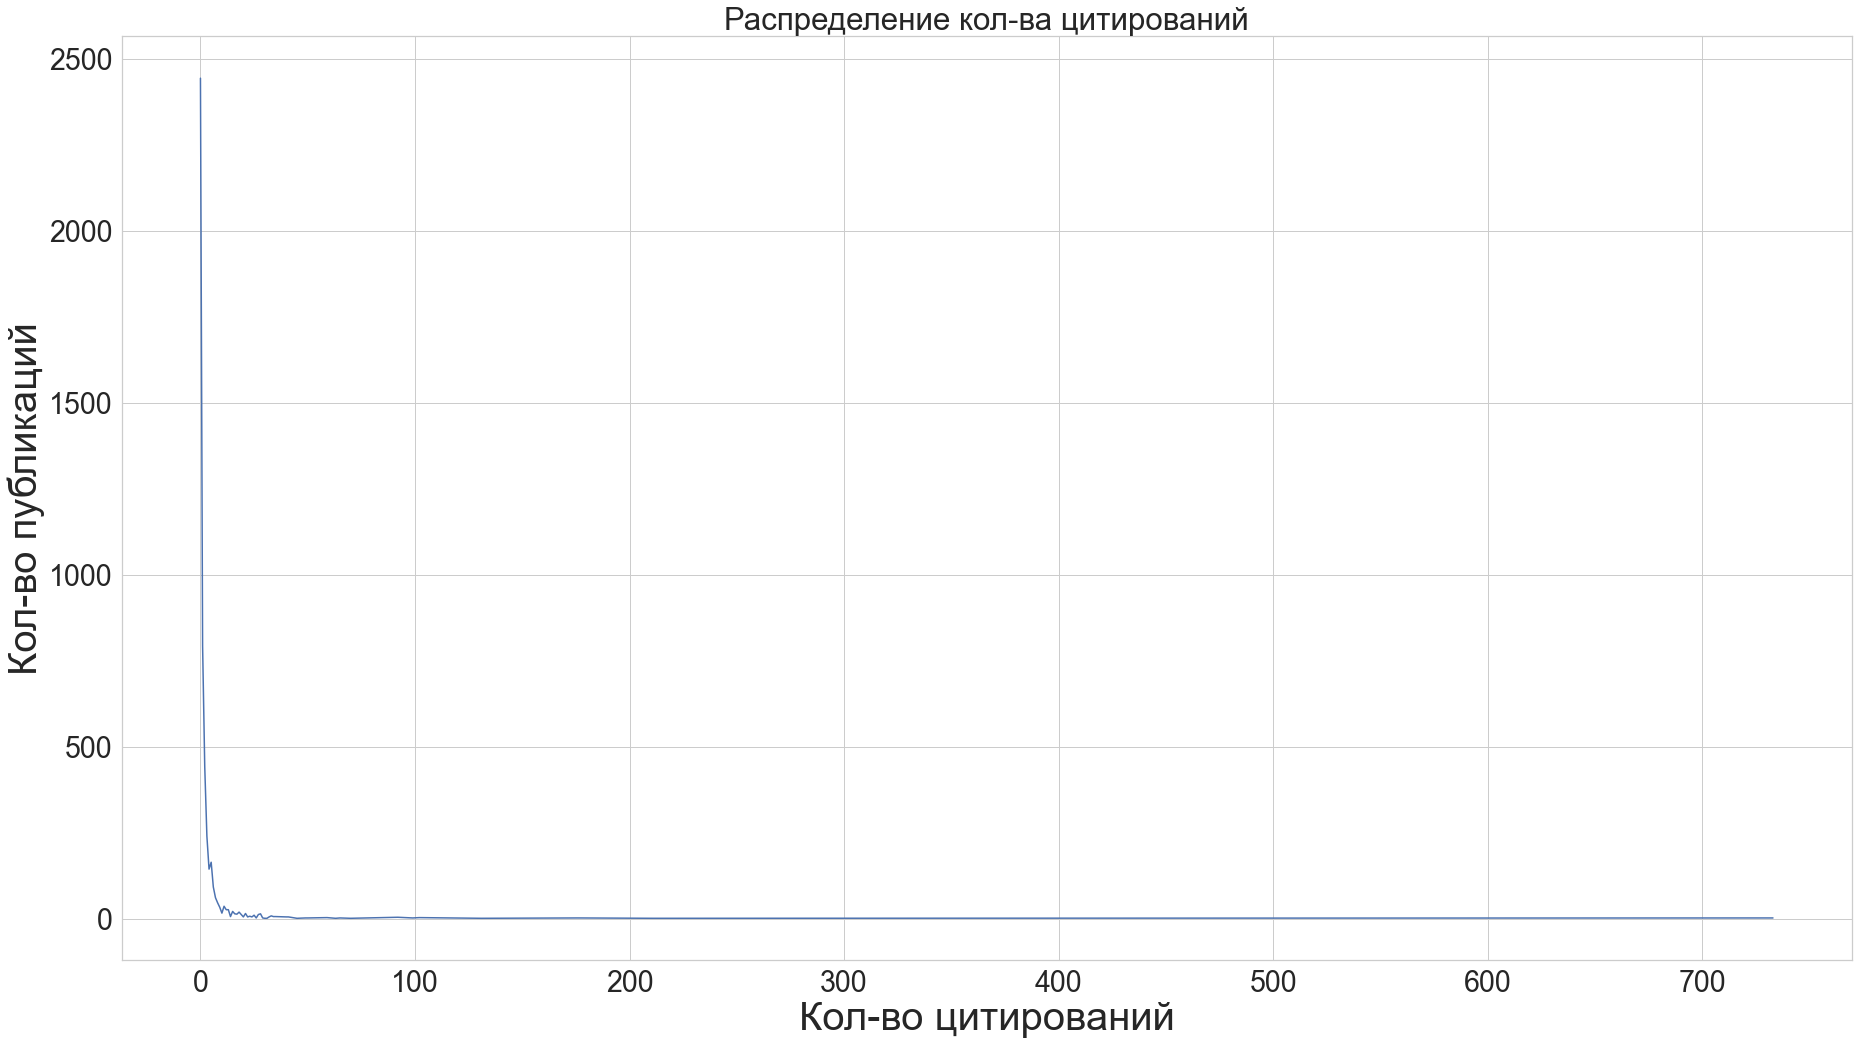

In [7]:
sns.set(rc={'figure.figsize':(31,17)})
sns.set_theme(style="whitegrid", font_scale=2.6)
ax = sns.lineplot(x=graph_pivot['noself_sum'], y=graph_pivot['eid'])
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value =p.get_height()
    ax.text(_x, _y, '{}'.format(round(value)), ha="center")
plt.title('Распределение кол-ва цитирований')
plt.ylabel('Кол-во публикаций', size=40)
plt.xlabel('Кол-во цитирований', size=40)
plt.show()

Рассмотрено суммарное кол-во цитирований в периоде 2015-2021 для публикаций 2015-2019 и поделено на кол-во этих публикаций

In [8]:
journal_data = pd.read_excel('H:/Python/PyProj/Scopus_data/source_data_20211020/sources_20211020.xlsx')
journal_data
docs_n_journals = uniq_eid.join(journal_data.set_index(['journal', 'subject']), on=['journal', 'subject'])
docs_n_journals

,journal,subject,quartile
0,Journal of the Experimental Analysis of Behavior,Experimental and Cognitive Psychology,2
1,Journal of the Experimental Analysis of Behavior,Behavioral Neuroscience,3
2,Journal of the History of the Behavioral Sciences,History,1
3,Journal of the History of the Behavioral Sciences,Psychology (miscellaneous),3
4,Journal of Trauma and Dissociation,Clinical Psychology,2
...,...,...,...
59339,Medicine in Microecology,Rheumatology,4
59340,Medicine in Microecology,Immunology and Allergy,4
59341,Clinical and Experimental Pediatrics,Pediatrics,1
59342,Clinical and Experimental Pediatrics,"Pediatrics, Perinatology and Child Health",2


,eid,journal,subject,date,y_0,y_1,y_2,y_3,y_4,y_5,noself_sum,quartile
0,2-s2.0-84952684349,International Journal of Modern Physics A,"Atomic and Molecular Physics, and Optics",2015,0,0,0,0,0,0,0.0,3.0
1,2-s2.0-84952684349,International Journal of Modern Physics A,Nuclear and High Energy Physics,2015,0,0,0,0,0,0,0.0,2.0
2,2-s2.0-84952684349,International Journal of Modern Physics A,Astronomy and Astrophysics,2015,0,0,0,0,0,0,0.0,3.0
3,2-s2.0-84942413228,Journal of Inequalities and Applications,Analysis,2015,0,0,0,0,0,1,1.0,1.0
4,2-s2.0-84942413228,Journal of Inequalities and Applications,Discrete Mathematics and Combinatorics,2015,0,0,0,0,0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2-s2.0-84958260936,Advances in Intelligent Systems and Computing,Control and Systems Engineering,2016,0,0,0,0,0,0,0.0,NaN
4787,2-s2.0-84958260936,Advances in Intelligent Systems and Computing,Computer Science (all),2016,0,0,0,0,0,0,0.0,NaN
4788,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Analysis,2016,0,0,0,0,0,0,0.0,3.0
4789,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Algebra and Number Theory,2016,0,0,0,0,0,0,0.0,3.0


In [9]:
docs_n_journals_clean = docs_n_journals.dropna(subset=['quartile']).reset_index(drop=True)
docs_n_journals_clean

,eid,journal,subject,date,y_0,y_1,y_2,y_3,y_4,y_5,noself_sum,quartile
0,2-s2.0-84952684349,International Journal of Modern Physics A,"Atomic and Molecular Physics, and Optics",2015,0,0,0,0,0,0,0.0,3.0
1,2-s2.0-84952684349,International Journal of Modern Physics A,Nuclear and High Energy Physics,2015,0,0,0,0,0,0,0.0,2.0
2,2-s2.0-84952684349,International Journal of Modern Physics A,Astronomy and Astrophysics,2015,0,0,0,0,0,0,0.0,3.0
3,2-s2.0-84942413228,Journal of Inequalities and Applications,Analysis,2015,0,0,0,0,0,1,1.0,1.0
4,2-s2.0-84942413228,Journal of Inequalities and Applications,Discrete Mathematics and Combinatorics,2015,0,0,0,0,0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2-s2.0-84978472800,CEUR Workshop Proceedings,Computer Science (all),2016,0,0,0,0,0,0,0.0,4.0
3001,2-s2.0-84964833308,International Journal of Polymer Science,Polymers and Plastics,2016,0,0,0,0,0,0,0.0,2.0
3002,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Analysis,2016,0,0,0,0,0,0,0.0,3.0
3003,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Algebra and Number Theory,2016,0,0,0,0,0,0,0.0,3.0


In [10]:
doc_data = docs_n_journals_clean.query('2015<=date<=2019').reset_index(drop=True)
subj_pivot = doc_data.pivot_table(index='subject', columns='quartile', values=['noself_sum', 'eid'], aggfunc={'noself_sum':'sum', 'eid':'count'})
subj_pivot = subj_pivot.fillna(0)
subj_pivot
subj_pivot.index
subj_pivot.columns
subj_pivot.columns[0][1]
subj_pivot.loc[subj_pivot.index[0], subj_pivot.columns[2]]

eid                  \
quartile                                            1.0  2.0   3.0  4.0   
subject                                                                   
Accounting                                          0.0  0.0   1.0  0.0   
Acoustics and Ultrasonics                           0.0  1.0   0.0  0.0   
Aerospace Engineering                               0.0  0.0  17.0  0.0   
Agricultural and Biological Sciences (all)          3.0  0.0   1.0  0.0   
Agricultural and Biological Sciences (miscellan...  1.0  1.0   0.0  0.0   
...                                                 ...  ...   ...  ...   
Urban Studies                                       0.0  1.0   0.0  0.0   
Veterinary (all)                                    0.0  0.0   1.0  0.0   
Virology                                            0.0  1.0   0.0  0.0   
Waste Management and Disposal                       1.0  0.0   5.0  1.0   
Water Science and Technology                        0.0  3.0   5.0  1.0   

                                                   noself_sum                   
quartile                                                  1.0   2.0   3.0  4.0  
subject                                                                         
Accounting                                                0.0   0.0   2.0  0.0  
Acoustics and Ultrasonics                                 0.0   2.0   0.0  0.0  
Aerospace Engineering                                     0.0   0.0  19.0  0.0  
Agricultural and Biological Sciences (all)               46.0   0.0   1.0  0.0  
Agricultural and Biological Sciences (miscellan...        5.0   2.0   0.0  0.0  
...                                                       ...   ...   ...  ...  
Urban Studies                                             0.0   5.0   0.0  0.0  
Veterinary (all)                                          0.0   0.0   1.0  0.0  
Virology                                                  0.0   5.0   0.0  0.0  
Waste Management and Disposal                            45.0   0.0   7.0  0.0  
Water Science and Technology                              0.0  25.0   2.0  0.0  

[187 rows x 8 columns]

Index(['Accounting', 'Acoustics and Ultrasonics', 'Aerospace Engineering',
       'Agricultural and Biological Sciences (all)',
       'Agricultural and Biological Sciences (miscellaneous)',
       'Agronomy and Crop Science', 'Algebra and Number Theory', 'Analysis',
       'Analytical Chemistry', 'Animal Science and Zoology',
       ...
       'Surfaces and Interfaces', 'Surfaces, Coatings and Films',
       'Theoretical Computer Science',
       'Tourism, Leisure and Hospitality Management', 'Transportation',
       'Urban Studies', 'Veterinary (all)', 'Virology',
       'Waste Management and Disposal', 'Water Science and Technology'],
      dtype='object', name='subject', length=187)

MultiIndex([(       'eid', 1.0),
            (       'eid', 2.0),
            (       'eid', 3.0),
            (       'eid', 4.0),
            ('noself_sum', 1.0),
            ('noself_sum', 2.0),
            ('noself_sum', 3.0),
            ('noself_sum', 4.0)],
           names=[None, 'quartile'])

1.0

1.0

Здесь идет подсчет среднего числа цитирований сабжекта по квартилю журнала

In [11]:
avg_pivot = pd.DataFrame(columns=['subject', 'q_1', 'q_2', 'q_3', 'q_4' ])
for i in range(len(subj_pivot.index)):
    for j in range(4):
        if subj_pivot.loc[subj_pivot.index[i], subj_pivot.columns[j]] == 0:
            avg_pivot.loc[i, 'subject'] = subj_pivot.index[i]
            avg_pivot.loc[i, 'q_{}'.format(j+1)] = 0
        else:
            avg_pivot.loc[i, 'subject'] = subj_pivot.index[i]
            avg_pivot.loc[i, 'q_{}'.format(j+1)] = subj_pivot.loc[subj_pivot.index[i], subj_pivot.columns[j+4]]/subj_pivot.loc[subj_pivot.index[i], subj_pivot.columns[j]]
avg_pivot

,subject,q_1,q_2,q_3,q_4
0,Accounting,0,0,2.0,0
1,Acoustics and Ultrasonics,0,2.0,0,0
2,Aerospace Engineering,0,0,1.117647,0
3,Agricultural and Biological Sciences (all),15.333333,0,1.0,0
4,Agricultural and Biological Sciences (miscella...,5.0,2.0,0,0
...,...,...,...,...,...
182,Urban Studies,0,5.0,0,0
183,Veterinary (all),0,0,1.0,0
184,Virology,0,5.0,0,0
185,Waste Management and Disposal,45.0,0,1.4,0.0


In [12]:
for i in tqdm(range(len(docs_n_journals_clean))):
    for j in range(len(avg_pivot)):
        if docs_n_journals_clean.loc[i,'subject'] == avg_pivot.loc[j, 'subject']:
            docs_n_journals_clean.loc[i, 'avg_cit'] = avg_pivot.loc[j, 'q_{}'.format(int(docs_n_journals_clean.loc[i, 'quartile']))]

100%|██████████| 3005/3005 [00:08<00:00, 342.66it/s]


In [13]:
docs_n_journals_clean['target'] = [int(docs_n_journals_clean.loc[i,'noself_sum']>docs_n_journals_clean.loc[i,'avg_cit']) for i in range(len(docs_n_journals_clean))]
docs_n_journals_clean

,eid,journal,subject,date,y_0,y_1,y_2,y_3,y_4,y_5,noself_sum,quartile,avg_cit,target
0,2-s2.0-84952684349,International Journal of Modern Physics A,"Atomic and Molecular Physics, and Optics",2015,0,0,0,0,0,0,0.0,3.0,5.400000,0
1,2-s2.0-84952684349,International Journal of Modern Physics A,Nuclear and High Energy Physics,2015,0,0,0,0,0,0,0.0,2.0,3.520000,0
2,2-s2.0-84952684349,International Journal of Modern Physics A,Astronomy and Astrophysics,2015,0,0,0,0,0,0,0.0,3.0,7.227273,0
3,2-s2.0-84942413228,Journal of Inequalities and Applications,Analysis,2015,0,0,0,0,0,1,1.0,1.0,2.000000,0
4,2-s2.0-84942413228,Journal of Inequalities and Applications,Discrete Mathematics and Combinatorics,2015,0,0,0,0,0,1,1.0,1.0,1.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2-s2.0-84978472800,CEUR Workshop Proceedings,Computer Science (all),2016,0,0,0,0,0,0,0.0,4.0,0.500000,0
3001,2-s2.0-84964833308,International Journal of Polymer Science,Polymers and Plastics,2016,0,0,0,0,0,0,0.0,2.0,6.250000,0
3002,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Analysis,2016,0,0,0,0,0,0,0.0,3.0,3.363636,0
3003,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Algebra and Number Theory,2016,0,0,0,0,0,0,0.0,3.0,0.500000,0


In [14]:
docs_n_journals_clean = docs_n_journals_clean.drop(['y_0','y_1','y_2','y_3','y_4','y_5', 'noself_sum', 'avg_cit'], axis=1)
docs_n_journals_clean = docs_n_journals_clean.drop_duplicates().reset_index(drop=True)
docs_n_journals_clean

,eid,journal,subject,date,quartile,target
0,2-s2.0-84952684349,International Journal of Modern Physics A,"Atomic and Molecular Physics, and Optics",2015,3.0,0
1,2-s2.0-84952684349,International Journal of Modern Physics A,Nuclear and High Energy Physics,2015,2.0,0
2,2-s2.0-84952684349,International Journal of Modern Physics A,Astronomy and Astrophysics,2015,3.0,0
3,2-s2.0-84942413228,Journal of Inequalities and Applications,Analysis,2015,1.0,0
4,2-s2.0-84942413228,Journal of Inequalities and Applications,Discrete Mathematics and Combinatorics,2015,1.0,0
...,...,...,...,...,...,...
3000,2-s2.0-84978472800,CEUR Workshop Proceedings,Computer Science (all),2016,4.0,0
3001,2-s2.0-84964833308,International Journal of Polymer Science,Polymers and Plastics,2016,2.0,0
3002,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Analysis,2016,3.0,0
3003,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Algebra and Number Theory,2016,3.0,0


<AxesSubplot:>

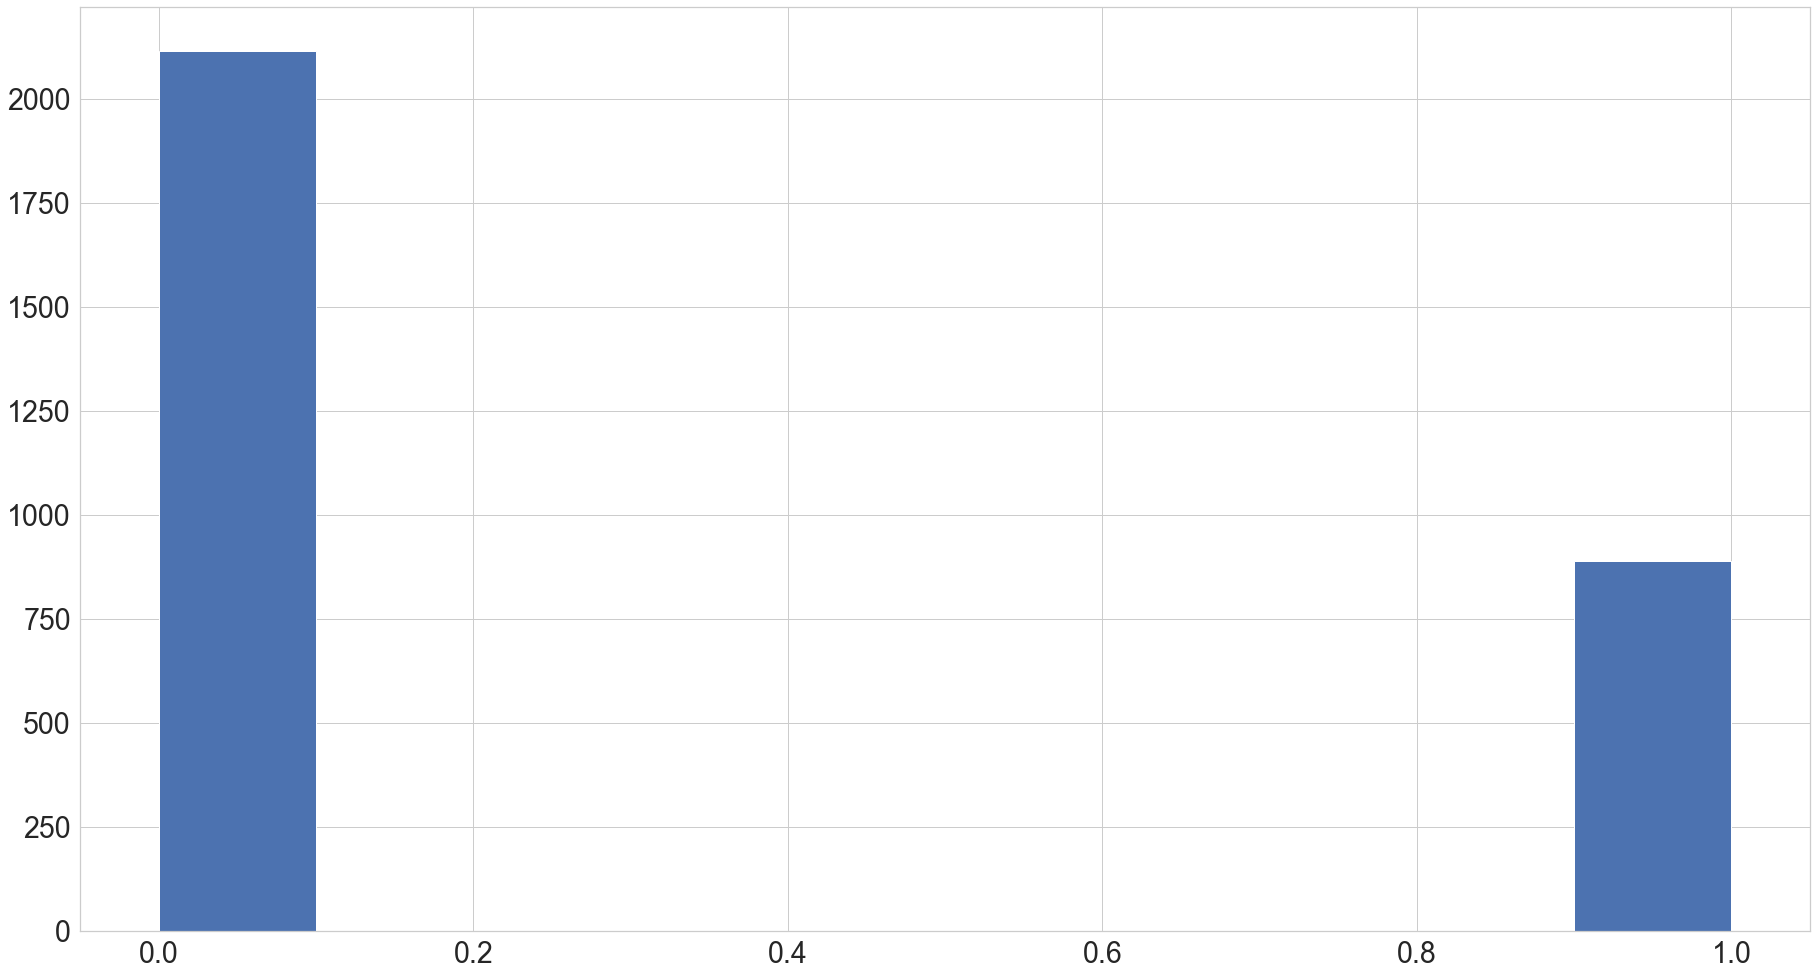

In [15]:
docs_n_journals_clean['target'].hist()

Очевидно, что за счет добавления сабжектов и рассчета таргета исходя из среднего цитирования по квартилю сабжекта, ситуация с дисбалансом данных несколько улучшилась, но тем не менее необходимо предпринять доп. меры по балансированию, но сначала необходимо добавить в датасет все признаки, связанные с NLP, т.е. провести лемматизацию и векторизацию в признаки

In [16]:
data_with_abstracts = docs_n_journals_clean.join(full_df.set_index('eid'), on='eid')
data_with_abstracts

,eid,journal,subject,date,quartile,target,abstract,ind_keywords
0,2-s2.0-84952684349,International Journal of Modern Physics A,"Atomic and Molecular Physics, and Optics",2015,3.0,0,NaN,NaN
1,2-s2.0-84952684349,International Journal of Modern Physics A,Nuclear and High Energy Physics,2015,2.0,0,NaN,NaN
2,2-s2.0-84952684349,International Journal of Modern Physics A,Astronomy and Astrophysics,2015,3.0,0,NaN,NaN
3,2-s2.0-84942413228,Journal of Inequalities and Applications,Analysis,2015,1.0,0,NaN,NaN
4,2-s2.0-84942413228,Journal of Inequalities and Applications,Discrete Mathematics and Combinatorics,2015,1.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...
3000,2-s2.0-84978472800,CEUR Workshop Proceedings,Computer Science (all),2016,4.0,0,This paper describes a parallel implementation...,Algorithms; Cluster analysis; Genetic algorith...
3001,2-s2.0-84964833308,International Journal of Polymer Science,Polymers and Plastics,2016,2.0,0,NaN,NaN
3002,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Analysis,2016,3.0,0,NaN,NaN
3003,2-s2.0-84958240999,St. Petersburg Mathematical Journal,Algebra and Number Theory,2016,3.0,0,NaN,NaN


In [17]:
def lemmatize(text):
    text_cleaned = " ".join(re.sub(r'[^a-zA-Z ]',' ',text).split())
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence_words = nltk.word_tokenize(text_cleaned)
    lem_text = " ".join([wordnet_lemmatizer.lemmatize((wordnet_lemmatizer.lemmatize(word)), pos='v') for word in sentence_words])
    return lem_text.lower()

test = 'Stretching my legs. Knives are sharper than i thought, sitting in the room'
lemmatize(test)

'stretching my leg knives be sharper than i think sit in the room'

In [18]:
data_with_abstracts.dropna(inplace=True)
data_with_abstracts.reset_index(drop=True, inplace=True)

In [19]:
for i in tqdm(range(len(data_with_abstracts))):
    try:
        data_with_abstracts.loc[i,'abs_lem'] = lemmatize(data_with_abstracts.loc[i, 'abstract'])
        data_with_abstracts.loc[i, 'kwrd_lem'] = lemmatize(data_with_abstracts.loc[i, 'ind_keywords'])
    except:
        data_with_abstracts.loc[i,:]
        break
data_with_abstracts

100%|██████████| 1469/1469 [00:03<00:00, 386.30it/s]


,eid,journal,subject,date,quartile,target,abstract,ind_keywords,abs_lem,kwrd_lem
0,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,Irradiated by heavy ions nanoporous polyethyle...,Activation energy; Chemical activation; Deposi...,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...
1,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,Irradiated by heavy ions nanoporous polyethyle...,Activation energy; Chemical activation; Deposi...,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...
2,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,"In this paper, we describe the synthesis, stru...",Energy dispersive spectroscopy; Magnetic domai...,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...
3,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,"In this paper, we describe the synthesis, stru...",Energy dispersive spectroscopy; Magnetic domai...,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...
4,2-s2.0-84948180151,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,"In this article, we report on functionalizatio...",Ascorbic acid; Carboxylic acids; Ethylene; Gra...,in this article we report on functionalization...,ascorbic acid carboxylic acid ethylene graftin...
...,...,...,...,...,...,...,...,...,...,...
1464,2-s2.0-84994085535,International Multidisciplinary Scientific Geo...,Geology,2016,4.0,0,"At the present day, wide use and production of...",Biology; Chromatographic analysis; Endocrinolo...,at the present day wide use and production of ...,biology chromatographic analysis endocrinology...
1465,2-s2.0-84990857902,Key Engineering Materials,Materials Science (all),2016,4.0,0,The results of the study of spectral and decay...,Cathodoluminescence; Energy transfer; Phosphor...,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...
1466,2-s2.0-84990857902,Key Engineering Materials,Mechanics of Materials,2016,4.0,0,The results of the study of spectral and decay...,Cathodoluminescence; Energy transfer; Phosphor...,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...
1467,2-s2.0-84990857902,Key Engineering Materials,Mechanical Engineering,2016,4.0,0,The results of the study of spectral and decay...,Cathodoluminescence; Energy transfer; Phosphor...,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...


In [20]:
data_with_abstracts = data_with_abstracts.drop(['abstract', 'ind_keywords'], axis=1)
data_with_abstracts

,eid,journal,subject,date,quartile,target,abs_lem,kwrd_lem
0,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...
1,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...
2,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...
3,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...
4,2-s2.0-84948180151,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,in this article we report on functionalization...,ascorbic acid carboxylic acid ethylene graftin...
...,...,...,...,...,...,...,...,...
1464,2-s2.0-84994085535,International Multidisciplinary Scientific Geo...,Geology,2016,4.0,0,at the present day wide use and production of ...,biology chromatographic analysis endocrinology...
1465,2-s2.0-84990857902,Key Engineering Materials,Materials Science (all),2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...
1466,2-s2.0-84990857902,Key Engineering Materials,Mechanics of Materials,2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...
1467,2-s2.0-84990857902,Key Engineering Materials,Mechanical Engineering,2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...


In [21]:
data_with_abstracts = data_with_abstracts.query('date<=2020').reset_index(drop=True)
data_with_abstracts

,eid,journal,subject,date,quartile,target,abs_lem,kwrd_lem
0,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...
1,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...
2,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...
3,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...
4,2-s2.0-84948180151,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,in this article we report on functionalization...,ascorbic acid carboxylic acid ethylene graftin...
...,...,...,...,...,...,...,...,...
1464,2-s2.0-84994085535,International Multidisciplinary Scientific Geo...,Geology,2016,4.0,0,at the present day wide use and production of ...,biology chromatographic analysis endocrinology...
1465,2-s2.0-84990857902,Key Engineering Materials,Materials Science (all),2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...
1466,2-s2.0-84990857902,Key Engineering Materials,Mechanics of Materials,2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...
1467,2-s2.0-84990857902,Key Engineering Materials,Mechanical Engineering,2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...


In [22]:
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf_abstracts = TfidfVectorizer(max_features=10000,stop_words=stopwords)
count_tf_idf_keys = TfidfVectorizer(max_features=4000,stop_words=stopwords)

In [23]:
tf_idf_abs = count_tf_idf_abstracts.fit_transform(data_with_abstracts['abs_lem'].values.astype('U'))
tf_idf_abs = pd.DataFrame.sparse.from_spmatrix(tf_idf_abs)
tf_idf_abs
abs_col = ['abs_{}'.format(i) for i in range(len(tf_idf_abs.columns))]
tf_idf_abs.columns = abs_col
tf_idf_abs

tf_idf_keys = count_tf_idf_keys.fit_transform(data_with_abstracts['kwrd_lem'].values.astype('U'))
tf_idf_keys = pd.DataFrame.sparse.from_spmatrix(tf_idf_keys)
tf_idf_keys
keys_col = ['keys_{}'.format(i) for i in range(len(tf_idf_keys.columns))]
tf_idf_keys.columns = keys_col
tf_idf_keys

,0,1,2,3,4,5,6,7,8,9,...,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.188374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,abs_0,abs_1,abs_2,abs_3,abs_4,abs_5,abs_6,abs_7,abs_8,abs_9,...,abs_7266,abs_7267,abs_7268,abs_7269,abs_7270,abs_7271,abs_7272,abs_7273,abs_7274,abs_7275
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.188374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,keys_0,keys_1,keys_2,keys_3,keys_4,keys_5,keys_6,keys_7,keys_8,keys_9,...,keys_4106,keys_4107,keys_4108,keys_4109,keys_4110,keys_4111,keys_4112,keys_4113,keys_4114,keys_4115
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
learning_data = data_with_abstracts.join(tf_idf_abs)
learning_data
learning_data = learning_data.join(tf_idf_keys)
learning_data

,eid,journal,subject,date,quartile,target,abs_lem,kwrd_lem,abs_0,abs_1,...,abs_7266,abs_7267,abs_7268,abs_7269,abs_7270,abs_7271,abs_7272,abs_7273,abs_7274,abs_7275
0,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2-s2.0-84948180151,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,in this article we report on functionalization...,ascorbic acid carboxylic acid ethylene graftin...,0.188374,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2-s2.0-84994085535,International Multidisciplinary Scientific Geo...,Geology,2016,4.0,0,at the present day wide use and production of ...,biology chromatographic analysis endocrinology...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,2-s2.0-84990857902,Key Engineering Materials,Materials Science (all),2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,2-s2.0-84990857902,Key Engineering Materials,Mechanics of Materials,2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,2-s2.0-84990857902,Key Engineering Materials,Mechanical Engineering,2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,eid,journal,subject,date,quartile,target,abs_lem,kwrd_lem,abs_0,abs_1,...,keys_4106,keys_4107,keys_4108,keys_4109,keys_4110,keys_4111,keys_4112,keys_4113,keys_4114,keys_4115
0,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2-s2.0-84948587456,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,irradiated by heavy ion nanoporous polyethylen...,activation energy chemical activation depositi...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2-s2.0-84948414305,Nuclear Instruments and Methods in Physics Res...,Instrumentation,2015,3.0,1,in this paper we describe the synthesis struct...,energy dispersive spectroscopy magnetic domain...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2-s2.0-84948180151,Nuclear Instruments and Methods in Physics Res...,Nuclear and High Energy Physics,2015,2.0,1,in this article we report on functionalization...,ascorbic acid carboxylic acid ethylene graftin...,0.188374,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2-s2.0-84994085535,International Multidisciplinary Scientific Geo...,Geology,2016,4.0,0,at the present day wide use and production of ...,biology chromatographic analysis endocrinology...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,2-s2.0-84990857902,Key Engineering Materials,Materials Science (all),2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,2-s2.0-84990857902,Key Engineering Materials,Mechanics of Materials,2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,2-s2.0-84990857902,Key Engineering Materials,Mechanical Engineering,2016,4.0,0,the result of the study of spectral and decay ...,cathodoluminescence energy transfer phosphors ...,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
learning_data.drop(['eid', 'journal', 'abs_lem', 'kwrd_lem', 'date'], axis=1, inplace=True)
learning_data.drop_duplicates(inplace=True)
learning_data.reset_index(drop=True, inplace=True)

In [26]:
over = SMOTENC(categorical_features=[learning_data.dtypes==object], sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]

In [27]:
pipeline = Pipeline(steps=steps)

In [28]:
len(learning_data[learning_data['target']==1])
len(learning_data[learning_data['target']==0])

460

1009

In [29]:
features, target = pipeline.fit_resample(learning_data.drop(['target'], axis=1), learning_data['target'])

H:\Python\Python\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
H:\Python\Python\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [30]:
np.count_nonzero(target)
np.count_nonzero(target-1)
features
pipelined_learning = features.join(target)
pipelined_learning

504

1008

,subject,quartile,abs_0,abs_1,abs_2,abs_3,abs_4,abs_5,abs_6,abs_7,...,keys_4106,keys_4107,keys_4108,keys_4109,keys_4110,keys_4111,keys_4112,keys_4113,keys_4114,keys_4115
0,Industrial and Manufacturing Engineering,3.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Condensed Matter Physics,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Physics and Astronomy (all),3.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Chemistry (all),3.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Condensed Matter Physics,2.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Geotechnical Engineering and Engineering Geology,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.092674,0.0,0.0,0.0,0.0
1508,Animal Science and Zoology,2.0,0.0,0.076229,0.0,0.0,0.0,0.381143,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1509,Applied Mathematics,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1510,Biotechnology,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


,subject,quartile,abs_0,abs_1,abs_2,abs_3,abs_4,abs_5,abs_6,abs_7,...,keys_4107,keys_4108,keys_4109,keys_4110,keys_4111,keys_4112,keys_4113,keys_4114,keys_4115,target
0,Industrial and Manufacturing Engineering,3.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
1,Condensed Matter Physics,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,Physics and Astronomy (all),3.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
3,Chemistry (all),3.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
4,Condensed Matter Physics,2.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Geotechnical Engineering and Engineering Geology,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.092674,0.0,0.0,0.0,0.0,1
1508,Animal Science and Zoology,2.0,0.0,0.076229,0.0,0.0,0.0,0.381143,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1509,Applied Mathematics,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1510,Biotechnology,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [31]:
train,test = train_test_split(pipelined_learning,test_size=.2,random_state=1111)
test,valid = train_test_split(test,test_size=.5,random_state=1111)
train
valid
test

,subject,quartile,abs_0,abs_1,abs_2,abs_3,abs_4,abs_5,abs_6,abs_7,...,keys_4107,keys_4108,keys_4109,keys_4110,keys_4111,keys_4112,keys_4113,keys_4114,keys_4115,target
661,Electrical and Electronic Engineering,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1028,Nature and Landscape Conservation,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
180,Geology,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
231,Polymers and Plastics,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
391,Electrical and Electronic Engineering,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,Materials Science (all),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1361,Analytical Chemistry,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
741,Physics and Astronomy (miscellaneous),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
311,Control and Systems Engineering,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


,subject,quartile,abs_0,abs_1,abs_2,abs_3,abs_4,abs_5,abs_6,abs_7,...,keys_4107,keys_4108,keys_4109,keys_4110,keys_4111,keys_4112,keys_4113,keys_4114,keys_4115,target
651,Environmental Science (all),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044893,0.046392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1305,Organic Chemistry,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1332,Geotechnical Engineering and Engineering Geology,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1156,Computer Networks and Communications,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1064,Chemistry (all),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Instrumentation,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1495,Electrical and Electronic Engineering,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
765,"Radiology, Nuclear Medicine and Imaging",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1036,Spectroscopy,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,subject,quartile,abs_0,abs_1,abs_2,abs_3,abs_4,abs_5,abs_6,abs_7,...,keys_4107,keys_4108,keys_4109,keys_4110,keys_4111,keys_4112,keys_4113,keys_4114,keys_4115,target
654,Electrical and Electronic Engineering,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1016,Fuel Technology,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1476,Organic Chemistry,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1174,Electrical and Electronic Engineering,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
861,Geochemistry and Petrology,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Geology,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
463,Applied Mathematics,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
312,Agricultural and Biological Sciences (all),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
477,Condensed Matter Physics,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [32]:
cat_dim = list(train.columns[train.dtypes==object])
# cb_list=[]

# for estim in [90, 110]:
#     for depth in [7, 10]:
#         model = CatBoostClassifier(max_depth = depth, n_estimators = estim, learning_rate=0.1, random_state=1111, cat_features=cat_dim)
#         model.fit(train.drop('target', axis=1), train['target'])
#         pred = model.predict(valid.drop('target', axis=1))
#         f1 = f1_score(valid['target'],pred,average='micro')
#         print("max_depth =", depth)
#         print("learning_rate = ", l_r)
#         print("n_estimators =", estim, ":", f1)            
#         cb_list.append([f1,estim,depth])

In [33]:
# cb_list = pd.DataFrame(cb_list)
# cb_list.loc[cb_list.loc[:,0].idxmax()]

In [34]:
model = CatBoostClassifier(max_depth = 10, n_estimators = 90, learning_rate=0.1, random_state=1111, cat_features=cat_dim)
model.fit(train.drop('target', axis=1), train['target'])

0:	learn: 0.6733546	total: 535ms	remaining: 47.7s
1:	learn: 0.6574563	total: 988ms	remaining: 43.5s
2:	learn: 0.6353684	total: 1.44s	remaining: 41.9s
3:	learn: 0.6202650	total: 1.87s	remaining: 40.2s
4:	learn: 0.6062731	total: 2.28s	remaining: 38.8s
5:	learn: 0.5959420	total: 2.7s	remaining: 37.8s
6:	learn: 0.5833844	total: 3.11s	remaining: 36.9s
7:	learn: 0.5698728	total: 3.51s	remaining: 36s
8:	learn: 0.5586369	total: 3.91s	remaining: 35.2s
9:	learn: 0.5483930	total: 4.3s	remaining: 34.4s
10:	learn: 0.5404844	total: 4.7s	remaining: 33.8s
11:	learn: 0.5288985	total: 5.09s	remaining: 33.1s
12:	learn: 0.5217998	total: 5.48s	remaining: 32.5s
13:	learn: 0.5155755	total: 5.88s	remaining: 31.9s
14:	learn: 0.5084516	total: 6.27s	remaining: 31.4s
15:	learn: 0.4980116	total: 6.68s	remaining: 30.9s
16:	learn: 0.4915681	total: 7.06s	remaining: 30.3s
17:	learn: 0.4850648	total: 7.45s	remaining: 29.8s
18:	learn: 0.4778615	total: 7.84s	remaining: 29.3s
19:	learn: 0.4694137	total: 8.24s	remaining: 2

In [35]:
pred = model.predict(test.drop('target', axis=1))
f1 = f1_score(test['target'],pred,average='micro')
f1

0.9006622516556292

In [36]:
model.save_model('cit_pred_model')

In [37]:
model = CatBoostClassifier()
model.load_model('cit_pred_model')

In [38]:
pickle.dump(tf_idf_abs, open("vectorizer_abs.pickle", "wb"))
pickle.dump(tf_idf_keys, open("vectorizer_keys.pickle", "wb"))

In [39]:
tf_idf_abs = pickle.load(open("vectorizer_abs.pickle", "rb"))
tf_idf_keys = pickle.load(open("vectorizer_keys.pickle", "rb"))

In [40]:
check = []
for i in range(len(avg_pivot)):
    for j in ['q_1', 'q_2', 'q_3', 'q_4']:
        if avg_pivot.loc[i,j] != 0:
            break
        elif j=='q_4' and avg_pivot.loc[i,j] == 0:
            check.append(avg_pivot.loc[i,:])
len(check)
len(avg_pivot)
check[0][0]

9

187

'Architecture'

In [42]:
avg_pivot
avg_pivot.to_excel('avg_pivot.xlsx', index=False)

,subject,q_1,q_2,q_3,q_4
0,Accounting,0,0,2.0,0
1,Acoustics and Ultrasonics,0,2.0,0,0
2,Aerospace Engineering,0,0,1.117647,0
3,Agricultural and Biological Sciences (all),15.333333,0,1.0,0
4,Agricultural and Biological Sciences (miscella...,5.0,2.0,0,0
...,...,...,...,...,...
182,Urban Studies,0,5.0,0,0
183,Veterinary (all),0,0,1.0,0
184,Virology,0,5.0,0,0
185,Waste Management and Disposal,45.0,0,1.4,0.0


In [43]:
vectorizer_abs = count_tf_idf_abstracts.fit(data_with_abstracts['abs_lem'].values.astype('U'))
vectorizer_keys = count_tf_idf_keys.fit(data_with_abstracts['kwrd_lem'].values.astype('U'))
pickle.dump(vectorizer_abs, open("vectorizer_abs.pickle", "wb"))
pickle.dump(vectorizer_keys, open("vectorizer_keys.pickle", "wb"))